In [1]:

import os
import pandas as pd
import numpy as np
file_path = "../data/"

data = pd.read_csv(file_path+"processed_data.csv")

data



,news_date,tokens
0,1/6/2011 2:45:49 PM,"தூக்கில்,தொங்கு,சேவல்கள்,திருடர்களை,காவு,வாங்க..."
1,1/6/2011 2:56:51 PM,"பவுர்ணமி,ஜாமத்தில்,மாயமான,கர்ப்பிணி"
2,1/6/2011 3:02:00 PM,"காமன்வெல்த்,ஊழல்,சுரேஷ்,கல்மாடியிட,கேள்விகள்"
3,1/6/2011 3:08:15 PM,"மச்சுபிச்சு,மலை,ரகசிய"
4,1/6/2011 3:09:20 PM,"ரத்த,பலி,வாங்கு,விபரீதம்,ஆவி"
...,...,...
9995,7/14/2011 1:09:23 PM,"பயிற்சி,ஆட்டத்தில்,இந்தியா,நாளை,மோதல்"
9996,7/14/2011 1:54:26 PM,"சச்சின்,புதிய,அவதார,நாசர்,உசேன்"
9997,7/14/2011 2:02:13 PM,"லோக்பாலில்,பிரதமர்,ராகுல்காந்தி,எதிர்ப்பு"
9998,7/14/2011 2:10:53 PM,"நக்சல்கள்,தப்பினர்,போலீசார்,சஸ்பெண்ட்"


In [2]:

  
data["tokens"] = data["tokens"].map(lambda x: str(x).split(","))


In [3]:

                                      
# Create a dictionary from ‘tokens’ containing the number of times a word appears in the training set.

from gensim import corpora

text_data = data["tokens"]
dictionary = corpora.Dictionary(text_data)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(text) for text in text_data]



In [4]:

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')


In [5]:
from gensim.models import LdaMulticore

NUM_TOPICS = 20
ldamodel = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=NUM_TOPICS, workers = 4, passes=10)
ldamodel.save('LDAmodel.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.069*"சென்னை" + 0.058*"காங்கிரஸ்" + 0.035*"போராட்டம்" + 0.033*"போட்டி"')
(1, '0.044*"தற்கொலை" + 0.043*"செய்" + 0.029*"பயிற்சி" + 0.025*"விமானம்"')
(2, '0.048*"இன்று" + 0.033*"தடை" + 0.028*"பாகிஸ்தான்" + 0.025*"ஜெயலலிதா"')
(3, '0.051*"பயங்கரம்" + 0.040*"தீ" + 0.034*"அரசு" + 0.033*"விலை"')
(4, '0.084*"மீண்டு" + 0.061*"லாரி" + 0.037*"வாய்ப்பு" + 0.033*"கோவை"')
(5, '0.067*"கோடி" + 0.040*"ல்" + 0.040*"கருணாநிதி" + 0.036*"_"')
(6, '0.040*"தலைவர்" + 0.030*"பணி" + 0.026*"இலங்கை" + 0.026*"பாஜ"')
(7, '0.067*"வழக்கு" + 0.057*"கல்வி" + 0.050*"விசாரணை" + 0.047*"சமச்சீர்"')
(8, '0.048*"பறிமுதல்" + 0.047*"ஆயிர" + 0.041*"கைது" + 0.027*"அமெரிக்கா"')
(9, '0.050*"பலி" + 0.049*"வா" + 0.026*"கடைசி" + 0.023*"கொலை"')
(10, '0.098*"பலி" + 0.059*"சாவு" + 0.054*"பரிதாப" + 0.044*"தேர்தல்"')
(11, '0.041*"கோயில்" + 0.035*"ராணுவம்" + 0.030*"சச்சின்" + 0.026*"கொலை"')
(12, '0.104*"கிளிப்பிங்ஸ்" + 0.090*"திடீர்" + 0.058*"மாணவர்" + 0.044*"நடிகை"')
(13, '0.076*"கொள்ளை" + 0.059*"டைமிங்" + 0.053*"லட்ச" + 0.052*"ஷாட்"

In [6]:
from gensim.models import CoherenceModel

topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = data['tokens'], corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())

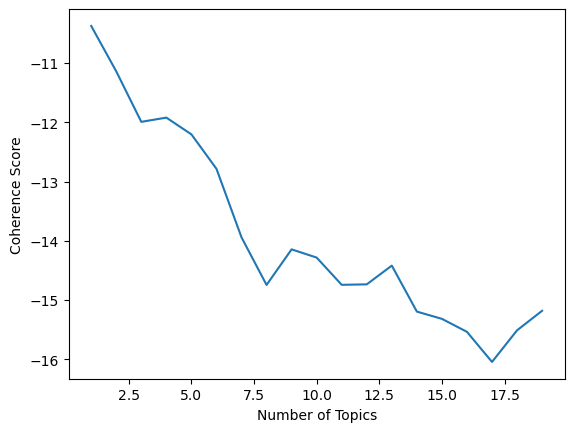

In [10]:
import matplotlib.pyplot as plt
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [11]:
score[15]

-15.539030397398292

In [12]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


/Users/samyuktha/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
